<a href="https://colab.research.google.com/github/JARAM2021/nlp_study/blob/Keunmo/week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

한글폰트 설치

In [1]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl

plt.rcParams['axes.unicode_minus'] = False

path = '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()

mpl.rc('font', family=font_name)
mpl.font_manager._rebuild()

nltk로 텍스트 토크나이징

In [3]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

def filesave(path, obj):
    outfile = open(path, 'w')
    outfile.write(str(obj))
    outfile.close()

rv_lyrics = open('/content/drive/MyDrive/NLP_Study/files/rv_lyrics.txt').read()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
words = word_tokenize(rv_lyrics)
filesave('/content/drive/MyDrive/NLP_Study/files/rv_lyrics_words.txt', words)

In [5]:
nltk.download('averaged_perceptron_tagger')
tagged_words = pos_tag(words)
filesave('/content/drive/MyDrive/NLP_Study/files/rv_lyrics_tagged_words.txt', tagged_words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [6]:
noun_words = [word for word, pos in tagged_words if pos in ['NN', 'NNP', 'NNS']]
filesave('/content/drive/MyDrive/NLP_Study/files/rv_lyrics_noun_words.txt', noun_words)

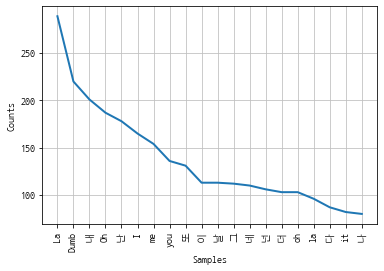

<Figure size 720x360 with 0 Axes>

In [18]:
from nltk import Text
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
text = Text(RegexpTokenizer('[\w]+').tokenize(rv_lyrics), name='RV_lyrics')
text.plot(20)
plt.figure(figsize=(10, 5))
plt.show()

In [19]:
from collections import Counter
cnt = Counter(text)
print(cnt.most_common(5))

[('La', 289), ('Dumb', 220), ('내', 201), ('Oh', 187), ('난', 178)]


# pre-training  
말 그대로 이미 훈련된 모델이라는 뜻이다. 전이학습에서 사전에 학습된 모델을 말하기도 한다. 자연어처리 분야에서 pre-train은 자연어를 기계가 처리할 수 있는 형태로 임베딩한 모델을 만들어놓는 것이다.  
# fine-tuning  
fine-tuning은 모델을 사용 목적에 맞게 바꾸는 것을 말한다. 기존에 학습된 모델의 가중치에 기반해서 사용할 목적에 맞게 데이터를 추가로 학습시켜서 파라미터를 업데이트 하는 것이다.  